# Importing Necessary Packeges and Loading Training Dataset

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Nadam
        
men_images = './Gender_Classifier/Gender_Classification_Images/faces/Enhanced_Images/train/0/'
women_images = './Gender_Classifier/Gender_Classification_Images/faces/Enhanced_Images/train/1/'

def load_img(images, filePath, label, imageSize):
    image_list = os.listdir(filePath)
    for img in image_list:
        picture = Image.open(filePath+img)
        new_size = picture.resize((imageSize, imageSize))
        new_sizeArr = np.asarray(new_size)
        new_sizeLa = (new_sizeArr, label)
        images.append(new_sizeLa)

In [2]:
data_list = []
imageSize = 100

load_img(data_list, men_images, 0, imageSize)
load_img(data_list, women_images, 1, imageSize)

In [3]:
np.random.shuffle(data_list)
data_list = list(zip(*data_list))

In [4]:
data = np.asarray(list(data_list[0]))
labels = np.asarray(list(data_list[1]))
trainX, testX, trainY, testY = train_test_split(data, labels, test_size = 0.20, random_state = 0)

# Feature scaling
trainX_nor = trainX.astype('float32') / 255.0
testX_nor = testX.astype('float32') / 255.0

In [8]:
trainX_nor.shape

(11200, 100, 100, 3)

In [9]:
trainY.shape

(11200,)

In [10]:
trainY = np.reshape(trainY, (11200,1))

# Model Development & Architecture

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape =(imageSize, imageSize, 3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

# sigmoid classifier
model.add(Dense(units = 1, activation = 'sigmoid'))


In [13]:
model.compile(loss = "binary_crossentropy", optimizer = 'nadam', metrics = ["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [15]:
H = model.fit(trainX_nor, trainY, validation_split=0.2, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
70/70 [==============================] - 470s 7s/step - loss: 0.6288 - accuracy: 0.6336 - val_loss: 0.4722 - val_accuracy: 0.7786
Epoch 2/10
70/70 [==============================] - 455s 6s/step - loss: 0.4642 - accuracy: 0.7801 - val_loss: 0.3980 - val_accuracy: 0.8134
Epoch 3/10
70/70 [==============================] - 451s 6s/step - loss: 0.3845 - accuracy: 0.8235 - val_loss: 0.3411 - val_accuracy: 0.8397
Epoch 4/10
70/70 [==============================] - 450s 6s/step - loss: 0.3495 - accuracy: 0.8415 - val_loss: 0.3206 - val_accuracy: 0.8656
Epoch 5/10
70/70 [==============================] - 11192s 162s/step - loss: 0.3118 - accuracy: 0.8606 - val_loss: 0.2827 - val_accuracy: 0.8750
Epoch 6/10
70/70 [==============================] - 8238s 119s/step - loss: 0.2918 - accuracy: 0.8693 - val_loss: 0.2724 - val_accuracy: 0.8701
Epoch 7/10
70/70 [==============================] - 124s 2s/step - loss: 0.2727 - accuracy: 0.8806 - val_loss: 0.2733 - val_accuracy: 0.8790
Epoch 

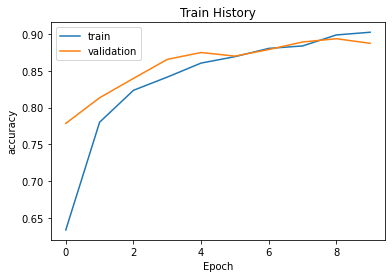

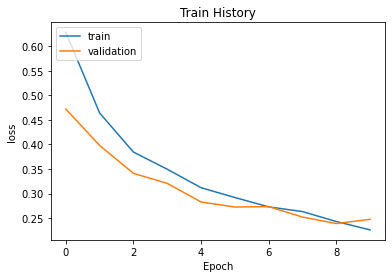

In [18]:
def show_train_history(H, train, validation):
    plt.plot(H.history[train])
    plt.plot(H.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(H, 'accuracy', 'val_accuracy')
show_train_history(H, 'loss', 'val_loss') 

In [20]:
scores = model.evaluate(testX_nor, testY, verbose=0)
scores[1]

0.8824999928474426

In [39]:
predict_X = (model.predict(testX_nor)>0.5).astype("int32")
predict_X.shape

(2800, 1)

# Model Evaluation

In [40]:
pd.crosstab(testY,predict_X.reshape(-1),
            rownames=['label'],colnames=['predict'])

predict,0,1
label,,
0,1184,143
1,186,1287



Confusion matrix :


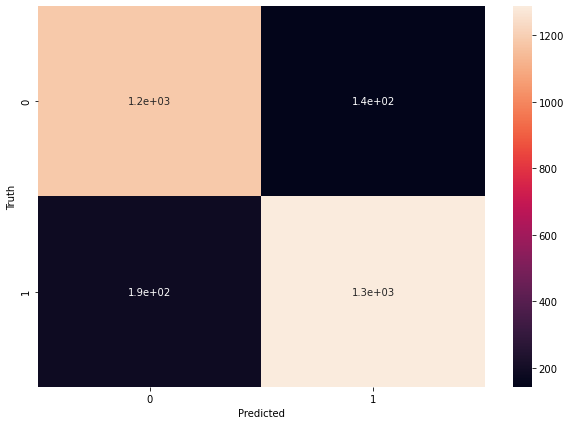

In [42]:

print('\nConfusion matrix :')
cm = confusion_matrix(testY, predict_X)

def confusionMatrix(a):
    plt.figure(figsize = (10, 7))
    sns.heatmap(a, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    
confusionMatrix(cm)